# Trading Strategy Backtesting Framework (Python)
This notebook demonstrates the development and evaluation of various algorithmic trading strategies using Python compared to a buy-and-hold benchmark.

We backtest:
- RSI-based strategy (mean reversion)
- SMA crossover strategy (trend following)
- Buy-and-Hold benchmark

Performance is measured using industry-standard metrics and visualized for comparison.


In [2]:
# Add src folder to Python path so we can import modules
import sys, os
sys.path.append(os.path.abspath("../src"))
import pandas as pd
import matplotlib.pyplot as plt
from metrics import calculate_cagr, calculate_volatility, calculate_sharpe, calculate_max_drawdown
from plot import plot_portfolio_comparison, plot_signals


In [3]:
df_rsi = pd.read_csv("../output/rsi_strategy.csv", index_col="Date", parse_dates=True)
df_sma = pd.read_csv("../output/sma_crossover.csv", index_col="Date", parse_dates=True)
df_bh  = pd.read_csv("../output/buy_and_hold.csv", index_col="Date", parse_dates=True)

Portfolio comparison saved to ../output\portfolio_comparison.png


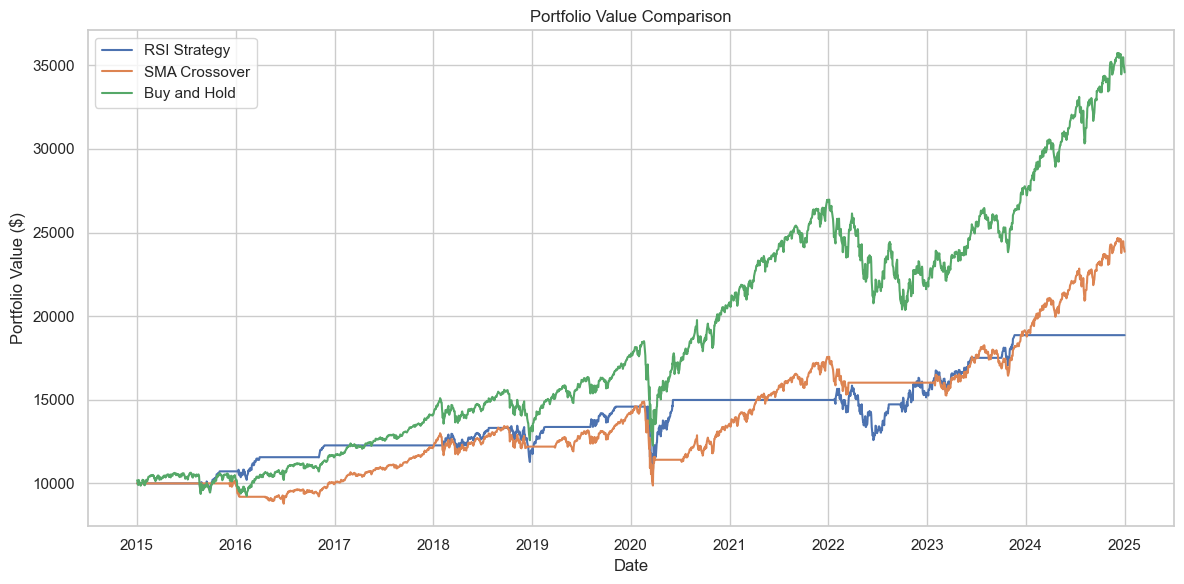

In [4]:
strategies = {
    "RSI Strategy": df_rsi["Portfolio"],
    "SMA Crossover": df_sma["Portfolio"],
    "Buy and Hold": df_bh["Portfolio"]
}

plot_portfolio_comparison(strategies, df_rsi, output_dir="../output")

In [ ]:
def collect_metrics(df, col):
    return {
        "CAGR": calculate_cagr(df[col]),
        "Volatility": calculate_volatility(df[col]),
        "Sharpe Ratio": calculate_sharpe(df[col]),
        "Max Drawdown": calculate_max_drawdown(df[col])
    }

metrics_data = {
    "RSI Strategy": collect_metrics(df_rsi, "Portfolio"),
    "SMA Crossover": collect_metrics(df_sma, "Portfolio"),
    "Buy and Hold": collect_metrics(df_bh, "Portfolio")
}

pd.DataFrame(metrics_data).T.style.format({                                        
    "CAGR": "{:.2%}",
    "Volatility": "{:.2%}",
    "Sharpe Ratio": "{:.2f}",
    "Max Drawdown": "{:.2%}"
})


,CAGR,Volatility,Sharpe Ratio,Max Drawdown
RSI Strategy,6.56%,14.22%,51.86%,-28.32%
SMA Crossover,9.09%,14.06%,69.08%,-33.72%
Buy and Hold,13.01%,17.62%,78.39%,-33.72%


RSI Strategy signal plot saved to ../output\rsi_strategy_rsi_signals.png


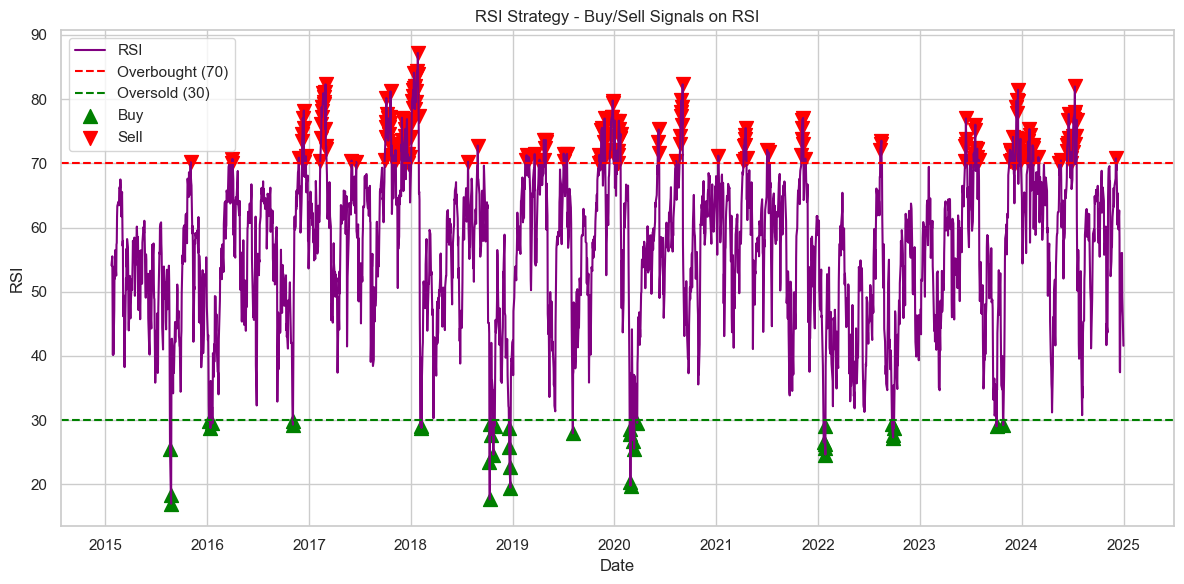

SMA Crossover signal plot saved to ../output\sma_crossover_sma50_signals.png


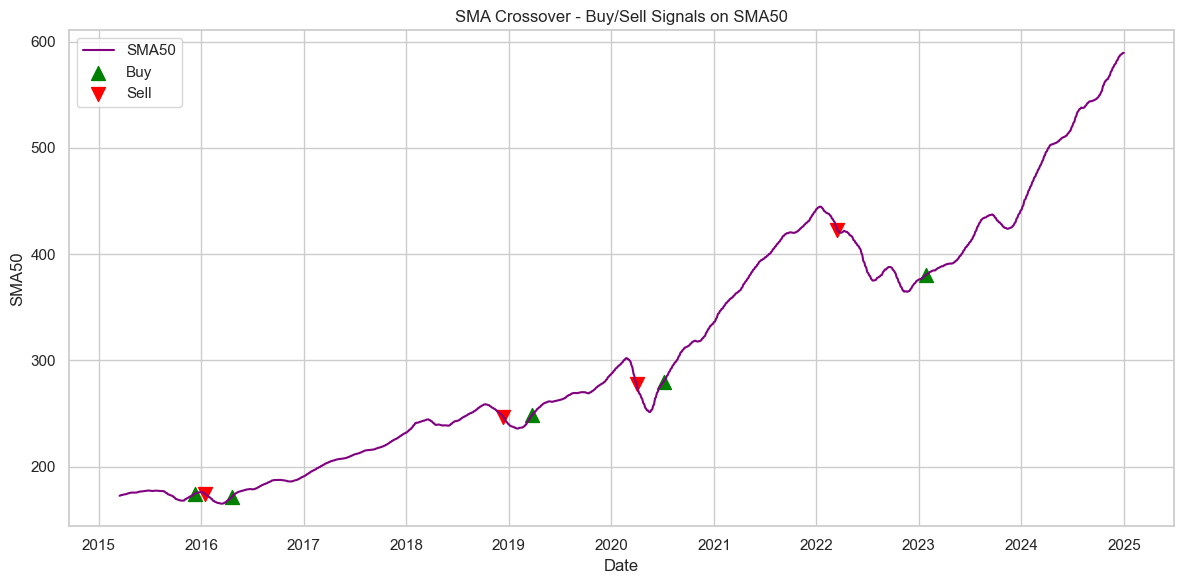

In [5]:
from rsi_strategy import add_rsi, generate_signals as generate_rsi_signals
from sma_strategy import add_sma, generate_signals as generate_sma_signals

output_dir = "../output"

df_rsi = add_rsi(df_rsi)
df_rsi = generate_rsi_signals(df_rsi)
plot_signals(df_rsi, "RSI", "RSI Strategy", output_dir=output_dir)

df_sma = add_sma(df_sma)
df_sma = generate_sma_signals(df_sma)
plot_signals(df_sma, "SMA50", "SMA Crossover", output_dir=output_dir)


## Conclusion

This project demonstrates a flexible and modular backtesting system for comparing trading strategies.

1. Buy and Hold outperforms the two tested algo strategies by a significant margin. 
2. The SMA crossover strategy shines more during clear, trending environments, but lags during sideways movement  
3. The RSI strategy tends to perform better in choppy, mean-reverting markets where quick reversals are common.

There’s still a lot of room to take this further. Possible next steps include:
- Adding new strategies like MACD or Bollinger Bands
- Incorporating walk-forward testing to better simulate real-world performance
- Modeling position sizing, slippage, or transaction costs for more realistic backtests